# <font color='#3d59c6'>  OPTIMIZACIÓN </font>


## <font color='#3d59c6'>  Introducción </font>

Optimización de algoritmos de Aprendizaje supervisado
Clasificación, aplicados a índices macroeconómicos.

 **Estrategia**

Utilizando modelado de datos de practica de Clasificación se utilizan métodos de optimización en Arboles de decisión multiclase
* Método Grid Search
* Metodo RandomSearchAnálisis de Componentes Principales
* Método Bayes
* Conclusiones
* Optativo:Opiniones


Ahora, para ver el comportamiento del método Decision Tree multiclase, vamos a usar los umbrales de ingresos que utiliza el Banco Mundial. Esta vez, vamos a dejar los 4, ya que este modelo debería ser capaz de hacer clasificación multiclase.

*   Nivel de Ingresos Bajo [0]: GNI per cápita <1006
*   Nivel de Ingresos Mediano Bajo[1]: GNI per cápita 1005> y <3955
*   Nivel de Ingresos Medio-Alto [2]: GNI per cápita 3956> y <12235
*   Nivel de Ingresos Alto[3]: GNI per cápita >12235


En este caso vamos a tomar mas registros para ver como se comporta el modelo cuando tiene que hacer más restas. Así que se van a tomar los datos de 10 años. Del 2010 al 2019.

Cabe resaltar, que se toma para los umbrales un valor medio entre 2010 y 2019. Lo suyo sería que cada año tuviera los umbrales estipulados por el banco mundial.

## <font color='#3d59c6'>  Carga de Packages </font>

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from skopt.space import Integer, Categorical
from skopt import BayesSearchCV












In [53]:
#  pip install --upgrade scikit-optimize numpy


## <font color='#3d59c6'>  Carga de Datos </font>

In [54]:
global_indicators = pd.read_csv("/content/Global Economy Indicators.csv")

global_indicators.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


## <font color='#3d59c6'>  Limpieza de Datos </font>

In [55]:
global_indicators.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [56]:

datos_optativo = global_indicators.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = [ ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', ' Changes in inventories ',' Gross National Income(GNI) in USD ']
datos_optativo = datos_optativo.drop(columnas_a_eliminar, axis=1)


# Cambiar los nombres de las columnas a versiones más cortas
nuevos_nombres = {
    ' CountryID ': 'CountryID',
    ' Country ': 'Country',
    ' Year ': 'Year',
    ' Population ': 'Population',
    ' Per capita GNI ': 'pcGNI',
    ' Agriculture, hunting, forestry, fishing (ISIC A-B) ': 'Agriculture',
    ' Construction (ISIC F) ': 'Construction',
    ' Exports of goods and services ': 'Exports',
    ' Final consumption expenditure ': 'FinalConsumption',
    ' General government final consumption expenditure ': 'GovtConsumption',
    ' Gross capital formation ': 'GrossCapFormation',
    ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ': 'GrossFixedCapFormation',
    ' Household consumption expenditure (including Non-profit institutions serving households) ': 'HouseholdConsumption',
    ' Imports of goods and services ': 'Imports',
    ' Manufacturing (ISIC D) ': 'Manufacturing',
    ' Mining, Manufacturing, Utilities (ISIC C-E) ': 'Mining',
    ' Other Activities (ISIC J-P) ': 'OtherActivities',
    ' Total Value Added ': 'TotalValueAdded',
    ' Transport, storage and communication (ISIC I) ': 'Transport',
    ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ': 'Wholesale',
    ' Gross Domestic Product (GDP) ': 'GDP'

}

datos_optativo = datos_optativo.rename(columns=nuevos_nombres)

In [57]:
datos_optativo = datos_optativo[~datos_optativo['Country'].isin([' D.P.R. of Korea ', ' China, Macao SAR ', ' Sint Maarten (Dutch part) ', ' Monaco ',  ' Venezuela (Bolivarian Republic of) ', ' Tuvalu ' ])]


In [58]:
def categorizar_ingresos(gni_per_capita):
    if gni_per_capita < 1006:
        return 0  # Nivel de Ingresos Bajo
    elif 1005 < gni_per_capita < 3955:
        return 1  # Nivel de Ingresos Mediano Bajo
    elif 3956 < gni_per_capita < 12235:
        return 2  # Nivel de Ingresos Medio-Alto
    else:
        return 3  # Nivel de Ingresos Alto

datos_optativo['ingresos'] = datos_optativo['pcGNI'].apply(categorizar_ingresos)


In [59]:
datos_optativo = datos_optativo.drop('pcGNI',axis=1)

In [60]:
# Filtrar los datos desde 2010 hasta 2019
datos_filtrados_optativo = datos_optativo[(datos_optativo['Year'] >= 2010) & (datos_optativo['Year'] <= 2019)].copy()


In [61]:
indices_optativo = datos_filtrados_optativo.drop(['Country', 'Year'], axis=1).copy()

In [62]:
indices_optativo.isnull().sum()

CountryID                 0
Population                0
Agriculture               0
Construction              0
Exports                   0
FinalConsumption          0
GovtConsumption           0
GrossCapFormation         0
GrossFixedCapFormation    0
HouseholdConsumption      0
Imports                   0
Manufacturing             0
Mining                    0
OtherActivities           0
TotalValueAdded           0
Transport                 0
Wholesale                 0
GDP                       0
ingresos                  0
dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler

# Escalar todas las variables Excepto Country ID e ingresos
variables_escalar = indices_optativo.drop(columns=['CountryID', 'ingresos'])


scaler_optativo = StandardScaler()

# Aplica el escalado a las variables seleccionadas
indices_scaled_optativo = variables_escalar.apply(lambda x: scaler_optativo.fit_transform(x.values.reshape(-1, 1))[:, 0] if x.name not in ['CountryID', 'ingresos'] else x)

# Agrega las columnas 'countryID' e 'ingresos' al DataFrame escalado
indices_scaled_optativo[['CountryID', 'ingresos']] = indices_optativo[['CountryID', 'ingresos']]

indices_scaled_optativo.head()

,Population,Agriculture,Construction,Exports,FinalConsumption,GovtConsumption,GrossCapFormation,GrossFixedCapFormation,HouseholdConsumption,Imports,Manufacturing,Mining,OtherActivities,TotalValueAdded,Transport,Wholesale,GDP,CountryID,ingresos
40,-0.052383,-0.153898,-0.250252,-0.358211,-0.216325,-0.242897,-0.214245,-0.212348,-0.207678,-0.333718,-0.210530,-0.235264,-0.196648,-0.220675,-0.208774,-0.225943,-0.229450,4,0
41,-0.044670,-0.144903,-0.249925,-0.360218,-0.214566,-0.241108,-0.213928,-0.212022,-0.205940,-0.331562,-0.210028,-0.234372,-0.195164,-0.219015,-0.207484,-0.224663,-0.227757,4,0
42,-0.035808,-0.140787,-0.249635,-0.360357,-0.214040,-0.239627,-0.213474,-0.211557,-0.205667,-0.327381,-0.210159,-0.234377,-0.194435,-0.218046,-0.205534,-0.223075,-0.226617,4,0
43,-0.027984,-0.140708,-0.249695,-0.358995,-0.214273,-0.239013,-0.213346,-0.211426,-0.206119,-0.327312,-0.210677,-0.234789,-0.194076,-0.217835,-0.204654,-0.222795,-0.226307,4,0
44,-0.019430,-0.142101,-0.249504,-0.357918,-0.214306,-0.237777,-0.213265,-0.211342,-0.206484,-0.329557,-0.210962,-0.234957,-0.193273,-0.217669,-0.205886,-0.223006,-0.226353,4,0


In [64]:
# Resumen de la variable objetivo "ingresos"
class_summary_opt = indices_scaled_optativo['ingresos'].value_counts(normalize=True) * 100
print(class_summary_opt)

3    34.302326
2    26.647287
1    26.114341
0    12.936047
Name: ingresos, dtype: float64


In [65]:
n = indices_scaled_optativo['ingresos'].count()
n

2064

## <font color='#3d59c6'>  Variables </font>

In [66]:
# Seleccionar las variables de interés
variables_tree_opt = [

     'CountryID',
     'Population',
    'Agriculture',
    'Construction',
    'Exports',
    'FinalConsumption',
     'GovtConsumption',
    'GrossCapFormation',
    'GrossFixedCapFormation',
    'HouseholdConsumption',
    'Imports',
    'Manufacturing',
    'Mining',
    'OtherActivities',
    'TotalValueAdded',
    'Transport',
    'Wholesale',
    'GDP',
    'ingresos'

]

# Crear el nuevo Dataset con las variables seleccionadas
indices_tree_opt = indices_scaled_optativo[variables_tree_opt].copy()

## <font color='#3d59c6'>  Original </font>

### <font color='#3d59c6'>  Entrenamiento </font>

In [67]:
X_tree_opt = indices_tree_opt.drop(['ingresos', 'CountryID'], axis=1)
y_tree_opt = indices_tree_opt['ingresos'].values


In [68]:
# Dividir en train y test
X_train_tree_opt, X_test_tree_opt, y_train_tree_opt, y_test_tree_opt = train_test_split(X_tree_opt,y_tree_opt,test_size=0.3,random_state=0)

In [69]:
#Creacion del modelo
tree_opt = DecisionTreeClassifier(max_depth=4, random_state = 0,max_leaf_nodes=50, min_samples_split=2, criterion='gini')

In [70]:
#Entrenamiento
tree_opt.fit(X_train_tree_opt, y_train_tree_opt)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, random_state=0)

In [71]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree_opt = tree_opt.predict(X_train_tree_opt)
y_test_pred_tree_opt = tree_opt.predict(X_test_tree_opt)

In [72]:
y_train_pred_tree_opt

array([1, 1, 3, ..., 0, 2, 2])

### <font color='#3d59c6'>  Evaluación </font>

In [73]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree_opt = accuracy_score(y_train_tree_opt, y_train_pred_tree_opt)

#Calculo el accuracy en Test
test_accuracy_tree_opt = accuracy_score(y_test_tree_opt, y_test_pred_tree_opt)

print('El accuracy en train es:', train_accuracy_tree_opt)
print('El accuracy en test es:', test_accuracy_tree_opt)

El accuracy en train es: 0.7098337950138505
El accuracy en test es: 0.65



Test Set:
Accuracy: 0.65

Confusion Matrix:


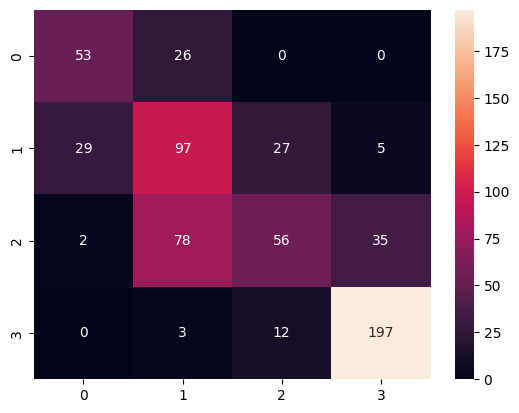


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        79
           1       0.48      0.61      0.54       158
           2       0.59      0.33      0.42       171
           3       0.83      0.93      0.88       212

    accuracy                           0.65       620
   macro avg       0.63      0.64      0.62       620
weighted avg       0.65      0.65      0.64       620



In [74]:


# Evaluate the model

accuracy_test_tree_opt = accuracy_score(y_test_tree_opt, y_test_pred_tree_opt)

conf_matrix_test_tree_opt = confusion_matrix(y_test_tree_opt, y_test_pred_tree_opt)

classification_rep_test_tree_opt = classification_report(y_test_tree_opt, y_test_pred_tree_opt)

# Print the results


print("\nTest Set:")
print(f"Accuracy: {accuracy_test_tree_opt:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test_tree_opt, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test_tree_opt)

## <font color='#3d59c6'>  Optimizaciones </font>

### <font color='#3d59c6'>  Definiciones </font>

Trabajando con los datos ya estandarizados del ejercicio de Clasificación utilizando arboles de decisión multiclase, hacemos optimizaciones de parámetros para ver si es posible obtener mejores resultados que la versión *vanilla* que viene por defecto en los clasificadores.

Recordemos que se utiliza la variable "ingresos", que fue creada a partir del nivel de ingresos per capita, utilizando rangos sugeridos por el banco mundial mencionados anteriormente.

*   Nivel de Ingresos Bajo [0]: GNI per cápita <1006
*   Nivel de Ingresos Mediano Bajo[1]: GNI per cápita 1005> y <3955
*   Nivel de Ingresos Medio-Alto [2]: GNI per cápita 3956> y <12235
*   Nivel de Ingresos Alto[3]: GNI per cápita >12235


In [75]:
X = indices_tree_opt.drop(['ingresos', 'CountryID'], axis=1)
y = indices_tree_opt['ingresos'].values

In [76]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### <font color='#3d59c6'>  Vanilla </font>


Vanilla execution time: 0.02748274803161621

Test Set:
Accuracy: 0.92

Confusion Matrix:


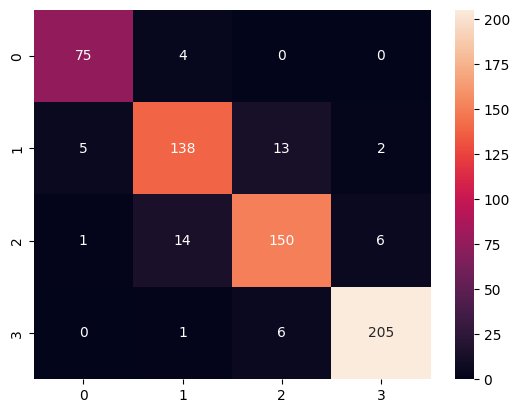


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.88      0.87      0.88       158
           2       0.89      0.88      0.88       171
           3       0.96      0.97      0.96       212

    accuracy                           0.92       620
   macro avg       0.91      0.92      0.92       620
weighted avg       0.92      0.92      0.92       620

Parámetros utilizados por el árbol de decisión:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best
Profundidad del árbol de decisión: 14
Precisión en conjunto de entrenamiento: 1.0
Precisión en conjunto de prueba: 0.9161290322580645
Hay overfitting: la precisión en entrenamiento es 0.08 mayor que en prueba.


In [77]:


#Utilizando el modelo sin parametrizar

model = DecisionTreeClassifier(random_state=42)

#Entrenamiento
starting_time = time.time()
model.fit(X_train, y_train)
train_time = time.time()

#Calculo de las predicciones en Train y Test
prediction = model.predict(X_test)
train_prediction = model.predict(X_train)

# Evaluamos el modelo

accuracy_test = accuracy_score(y_test, prediction)
accuracy_train = accuracy_score(y_train, train_prediction)

conf_matrix_test = confusion_matrix(y_test, prediction)

classification_rep_test = classification_report(y_test, prediction)

# Print the results

print("\nVanilla execution time:", train_time-starting_time)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test)

# Obtener los parámetros utilizados por el modelo
params = model.get_params()

# Imprimir los parámetros
print("Parámetros utilizados por el árbol de decisión:")
for key, value in params.items():
    print(f"{key}: {value}")

    # Obtener la profundidad del árbol de decisión
depth = model.tree_.max_depth

# Imprimir la profundidad
print("Profundidad del árbol de decisión:", depth)

print("Precisión en conjunto de entrenamiento:", accuracy_train)
print("Precisión en conjunto de prueba:", accuracy_test)

precision_difference = accuracy_train - accuracy_test

# Definir un umbral para determinar si la diferencia es considerable
umbral = 0.05  # Por ejemplo, consideraremos una diferencia mayor a 0.05 como considerable

# Verificar si hay Overfitting
if precision_difference > umbral:
    print(f"Hay overfitting: la precisión en entrenamiento es {precision_difference:.2f} mayor que en prueba.")
else:
    print("No hay overfitting: la precisión en prueba es igual o mayor que en entrenamiento.")

Del modelo en Vanila, podemos concluir que aunque utiliza una gran profundidad para hacer la clasificación (14), es bastante rápido y preciso. Sin embargo, sabemos que el overfitting en un árbol de clasificación ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien para nuevos datos. Es decir, el árbol de clasificación se ha "memorizado" los datos de entrenamiento en lugar de aprender patrones generales. La diferencia entre el accuracy Train y el Test es de 8%.

Asi que es una solución para obtener una clasificacion rápida y relativamente precisa, pero tener en cuenta un posible overfitting.

### <font color='#3d59c6'>  GridSearch </font>

Accuracy on the test set: 0.9226
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

GridSearch execution time: 9.076931476593018

Test Set:
Accuracy: 0.92

Confusion Matrix:


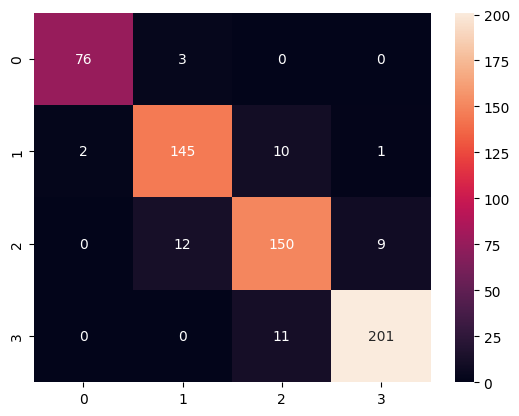


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.91      0.92      0.91       158
           2       0.88      0.88      0.88       171
           3       0.95      0.95      0.95       212

    accuracy                           0.92       620
   macro avg       0.93      0.93      0.93       620
weighted avg       0.92      0.92      0.92       620

Hay overfitting: la precisión en entrenamiento es 0.08 mayor que en prueba.


In [78]:

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
starting_time = time.time()
# Define parameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)


# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train a decision tree with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)
train_time = time.time()
# Make predictions on the test set
prediction = best_dt_classifier.predict(X_test)
train_prediction = best_dt_classifier.predict(X_train)


#Evaluating the model
accuracy_test = accuracy_score(y_test, prediction)
accuracy_train = accuracy_score(y_train, train_prediction)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

print("Best Parameters:", best_params)


conf_matrix_test = confusion_matrix(y_test, prediction)

classification_rep_test = classification_report(y_test, prediction)

# Print the results

print("\nGridSearch execution time:", train_time-starting_time)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test)


precision_difference = accuracy_train - accuracy_test

# Definir un umbral para determinar si la diferencia es considerable
umbral = 0.05  # Por ejemplo, consideraremos una diferencia mayor a 0.05 como considerable

# Verificar si hay Overfitting
if precision_difference > umbral:
    print(f"Hay overfitting: la precisión en entrenamiento es {precision_difference:.2f} mayor que en prueba.")
else:
    print("No hay overfitting: la precisión en prueba es igual o mayor que en entrenamiento.")

Encontramos unos muy buenos resultados con el Grid Search, con una profundidad de arbol de 10, menor al vanilla (14) obtiene resultados algo mejores (0.93). Se observa que juagando con los parametros de 'max_depth, poniendo valores de profundidad del atbol menores a 10, se obtienen resultados de accuracy de 0.92 pero demora 7 segundos en vez de 8 segundos.

### <font color='#3d59c6'>  RandomSearch </font>

Accuracy on the test set: 0.9016
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 14, 'criterion': 'entropy'}

RandomSearch execution time: 5.400615453720093

Test Set:
Accuracy: 0.90

Confusion Matrix:


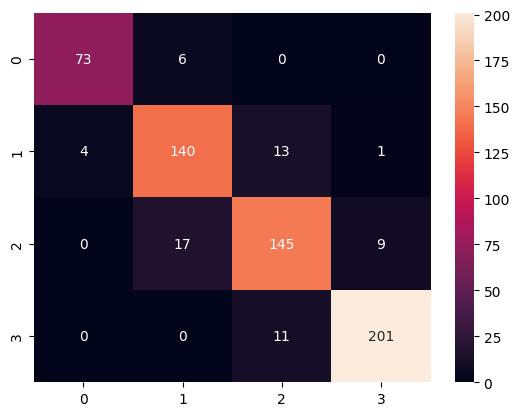


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.89      0.87       158
           2       0.86      0.85      0.85       171
           3       0.95      0.95      0.95       212

    accuracy                           0.90       620
   macro avg       0.90      0.90      0.90       620
weighted avg       0.90      0.90      0.90       620

Hay overfitting: la precisión en entrenamiento es 0.08 mayor que en prueba.


In [79]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define parameter grid for RandomizedSearch
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 20, 200),
    'min_samples_leaf': np.arange(2, 100)
}

# Perform RandomizedSearchCV
starting_time = time.time()
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, n_iter=50, cv=5, random_state=43)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)
train_time = time.time()

# Make predictions on the test set
prediction = best_dt_classifier.predict(X_test)
train_prediction = best_dt_classifier.predict(X_train)

###
#Evaluating the model
accuracy_test = accuracy_score(y_test, prediction)
accuracy_train = accuracy_score(y_train, train_prediction)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

print("Best Parameters:", best_params)


conf_matrix_test = confusion_matrix(y_test, prediction)

classification_rep_test = classification_report(y_test, prediction)

# Print the results

print("\nRandomSearch execution time:", train_time-starting_time)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test)


precision_difference = accuracy_train - accuracy_test

# Definir un umbral para determinar si la diferencia es considerable
umbral = 0.05  # Por ejemplo, consideraremos una diferencia mayor a 0.05 como considerable

# Verificar si hay Overfitting
if precision_difference > umbral:
    print(f"Hay overfitting: la precisión en entrenamiento es {precision_difference:.2f} mayor que en prueba.")
else:
    print("No hay overfitting: la precisión en prueba es igual o mayor que en entrenamiento.")


En randomsearch, observamos que llegá a su valor máximo de precición de 0.90 en n_iter=50. Cuando se coloca un valor de n_iter=500, demora unos 50 segundos y se obtiene la misma precisión.
Tiene demasiada profundidad el árbol y pareciera tener overfitting también, posiblemente debido a la profundidad del árbol.


### <font color='#3d59c6'>  Bayes </font>

In [80]:
!pip install scikit-optimize


Best: 0.910667 using OrderedDict([('criterion', 'entropy'), ('max_depth', None), ('max_leaf_nodes', 467), ('min_samples_leaf', 2), ('min_samples_split', 5)])
Accuracy on the test set: 0.9161
Best Parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', None), ('max_leaf_nodes', 467), ('min_samples_leaf', 2), ('min_samples_split', 5)])

RandomSearch execution time: 3.2748782634735107

Test Set:
Accuracy: 0.92

Confusion Matrix:


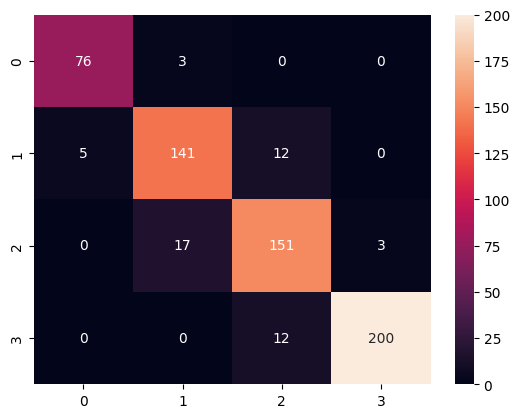


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        79
           1       0.88      0.89      0.88       158
           2       0.86      0.88      0.87       171
           3       0.99      0.94      0.96       212

    accuracy                           0.92       620
   macro avg       0.92      0.92      0.92       620
weighted avg       0.92      0.92      0.92       620

Hay overfitting: la precisión en entrenamiento es 0.07 mayor que en prueba.


In [81]:


# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'max_leaf_nodes': Integer(10, 500),
    'min_samples_split': Integer(2, 6),
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 10) if None else Categorical([None]),
    'min_samples_leaf': Integer(1, 4)
}

starting_time = time.time()
# Instanciar el clasificador
dt_classifier = DecisionTreeClassifier(random_state=42)

# Inicializar BayesSearchCV
bayes_search = BayesSearchCV(
    dt_classifier,
    param_space,
    cv=5,
    n_iter=10,
    random_state=42
)

np.int = int
# Entrenar BayesSearchCV
bayes_search.fit(X_train, y_train)

train_time = time.time()
# Obtener los mejores parámetros
best_params_bayes = bayes_search.best_params_
print("Best: %f using %s" % (bayes_search.best_score_, best_params_bayes))

# Make predictions on the test set
# Obtener el mejor modelo entrenado con los mejores parámetros
best_model = bayes_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
prediction = best_model.predict(X_test)
train_prediction = best_model.predict(X_train)





#Evaluating the model
accuracy_test = accuracy_score(y_test, prediction)
accuracy_train = accuracy_score(y_train, train_prediction)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

print("Best Parameters:", best_params_bayes)


conf_matrix_test = confusion_matrix(y_test, prediction)

classification_rep_test = classification_report(y_test, prediction)

# Print the results

print("\nRandomSearch execution time:", train_time-starting_time)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.show()
print("\nClassification Report:")
print(classification_rep_test)


precision_difference = accuracy_train - accuracy_test

# Definir un umbral para determinar si la diferencia es considerable
umbral = 0.05  # Por ejemplo, consideraremos una diferencia mayor a 0.05 como considerable

# Verificar si hay Overfitting
if precision_difference > umbral:
    print(f"Hay overfitting: la precisión en entrenamiento es {precision_difference:.2f} mayor que en prueba.")
else:
    print("No hay overfitting: la precisión en prueba es igual o mayor que en entrenamiento.")


Observamos que dan resultados similares al hacer bayes con n_iter=50 con n_iter=10. Parece haber menos overfitting con bayes.

## <font color='#3d59c6'>  Conclusiones </font>

| Decision Tree | Presicion | Recall | F1-Score | Time (s) | Profundidad del Arbol | min_samples_leaf | min_samples_split |
|---------------|-----------|--------|----------|----------|-----------------------|-------------------|-------------------|
| Vanilla       | 0.91      | 0.92   | 0.92     | 0.099    | 14                    | 1                 | 2                 |
| Grid Search   | 0.93      | 0.93   | 0.93     | 8.617    | 10                    | 1                 | 2                 |
| RandomSearch  | 0.9       | 0.9    | 0.9      | 5.067    | 14                    | 3                 | 2                 |
| Bayes         | 0.92      | 0.92   | 0.92     | 2.192    | 2                     | 2                 | 5                 |


Luego de evaluar los diferentes métodos de optimización, se concluye que parecen todos tener overfitting. Sin embargo, el método de grid search nos da posibilidad de controlar la profundidad del árbol dándonos una gran precisión. Sin embargo, es el método que mayor tiempo tomó.


El método Vanilla sin hiperparametrización parece ser un buen approach inicial, ya que muestra un accuracy, pero al no poder modificar los parámetros, la profundidad del árbol puede penalizar.


El método de random search muestra un accuracy bajo, cuando se compara con los otros. Sin embargo, tiene un tiempo de procesado más rápido que el de Grid Search.


El método de Optimización de Bayes puede llegar a tomar bastante tiempo dependiendo del número de iteraciones. Llega un punto en que la precisión ya no aumenta por más iteraciones que se hagan.


La hiperparametrización nos da un mayor control sobre el modelo, y nos permite entender de mejor manera los resultados para poder analizarlos mejor.


A comparación con el método de clasificación original, se pasó de una precisión de 63% en menos de un segundo, a una de 93% en 8 segundos, (o 91% en milésimas de segundo con vanilla).


Comprobar bien el overfitting es clave para decidir cual modelo es mejor. Una comparación entre el test y train accuracy puede ser una forma. Quizás habría que investigar que otros métodos visuales o numéricos se pueden implementar para asegurarnos que el método Vanilla no está haciendo overfitting.



## <font color='#3d59c6'>  Optativo </font>

Se aprende muchísimo en la clase. Esta bien dividida, al principio se van introduciendo los conceptos y luego en enero se empieza a hacer teoria y práctica. Quizas en las sesiones de python se pueden hacer lecciones de limpieza de datos, asi cuando sea momento de hacer agrupación, es posible tener el dataset ya limpio y puede que eso ayude con las entregas. En realidad opino que está bastante bien.

Algo que valoré muchísimo fue el calendario mostrando de donde venimos y hacia donde vamos en cada clase, y el resumen de lo que hemos visto. Me parece fundamental y una muy buena idea para reforzar conceptos y poder hacer preguntas también.